In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.2f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [3]:
import statsmodels
print("statsmodels version: ", statsmodels.__version__)
print("pandas version: ", pd.__version__)

statsmodels version:  0.14.0
pandas version:  2.1.0


# Data Cleaning

In [4]:
recycle = pd.read_csv('recycling_rate.csv')
print(recycle)

         Code                    Area  Recycling_rate
0   E09000002    Barking and Dagenham              25
1   E09000003                  Barnet              32
2   E09000004                  Bexley              54
3   E09000005                   Brent              34
4   E09000006                 Bromley              51
5   E09000007                  Camden              26
6   E09000008                 Croydon              49
7   E09000009                  Ealing              48
8   E09000010                 Enfield              33
9   E09000011               Greenwich              33
10  E09000012                 Hackney              28
11  E09000013  Hammersmith and Fulham              26
12  E09000014                Haringey              30
13  E09000015                  Harrow              39
14  E09000016                Havering              38
15  E09000017              Hillingdon              37
16  E09000018                Hounslow              32
17  E09000019               

In [5]:
education = pd.read_csv('education_qualifications.csv')
print(education)

         Code                    Area                              Percent_edu
0   E09000002    Barking and Dagenham                                    33.10
1   E09000003                  Barnet                                    53.20
2   E09000004                  Bexley                                    35.50
3   E09000005                   Brent                                    47.70
4   E09000006                 Bromley                                    54.10
5   E09000007                  Camden                                    60.90
6   E09000008                 Croydon                                    42.90
7   E09000009                  Ealing                                    58.70
8   E09000010                 Enfield                                    40.00
9   E09000011               Greenwich                                    49.70
10  E09000012                 Hackney                                    57.40
11  E09000013  Hammersmith and Fulham               

In [6]:
income = pd.read_csv('income_taxpayers.csv')
print(income)

         Code                    Area  Income
0   E09000002    Barking and Dagenham   29400
1   E09000003                  Barnet   51600
2   E09000004                  Bexley   36000
3   E09000005                   Brent   37800
4   E09000006                 Bromley   48200
5   E09000007                  Camden   96900
6   E09000008                 Croydon   37800
7   E09000009                  Ealing   42700
8   E09000010                 Enfield   39500
9   E09000011               Greenwich   44700
10  E09000012                 Hackney   47200
11  E09000013  Hammersmith and Fulham   75900
12  E09000014                Haringey   48600
13  E09000015                  Harrow   41500
14  E09000016                Havering   38100
15  E09000017              Hillingdon   37300
16  E09000018                Hounslow   41700
17  E09000019               Islington   66100
18  E09000020  Kensington and Chelsea  185000
19  E09000021    Kingston upon Thames   50500
20  E09000022                 Lamb

In [7]:
homeownership = pd.read_csv('tenure_households.csv')
print(homeownership)

         Code                    Area                     Homeownership_number
0   E09000002    Barking and Dagenham                                76,200.00
1   E09000003                  Barnet                               146,100.00
2   E09000004                  Bexley                                98,400.00
3   E09000005                   Brent                               122,100.00
4   E09000006                 Bromley                               129,800.00
5   E09000007                  Camden                               115,200.00
6   E09000008                 Croydon                               147,200.00
7   E09000009                  Ealing                               121,100.00
8   E09000010                 Enfield                               126,000.00
9   E09000011               Greenwich                               105,100.00
10  E09000012                 Hackney                               108,400.00
11  E09000013  Hammersmith and Fulham               

In [8]:
merged_df = pd.merge(recycle, education, on=['Code', 'Area'], how='left')
merged_df = pd.merge(merged_df, income, on=['Code', 'Area'], how='left')
merged_df = pd.merge(merged_df, homeownership, on=['Code', 'Area'], how='left')
merged_df = merged_df.drop(columns=['Code', 'Area'])
print(merged_df)

    Recycling_rate                              Percent_edu  Income  \
0               25                                    33.10   29400   
1               32                                    53.20   51600   
2               54                                    35.50   36000   
3               34                                    47.70   37800   
4               51                                    54.10   48200   
5               26                                    60.90   96900   
6               49                                    42.90   37800   
7               48                                    58.70   42700   
8               33                                    40.00   39500   
9               33                                    49.70   44700   
10              28                                    57.40   47200   
11              26                                    70.00   75900   
12              30                                    59.00   48600   
13    

In [9]:
merged_df.head()

,Recycling_rate,Percent_edu,Income,Homeownership_number
0,25,33.10,29400,"76,200.00"
1,32,53.20,51600,"146,100.00"
2,54,35.50,36000,"98,400.00"
3,34,47.70,37800,"122,100.00"
4,51,54.10,48200,"129,800.00"


In [51]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Recycling_rate        32 non-null     int64  
 1   Percent_edu           32 non-null     float64
 2   Income                32 non-null     int64  
 3   Homeownership_number  32 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.1 KB


## Checking the correlation between variables

Text(0.5, 1.0, 'Correlation Matrix')

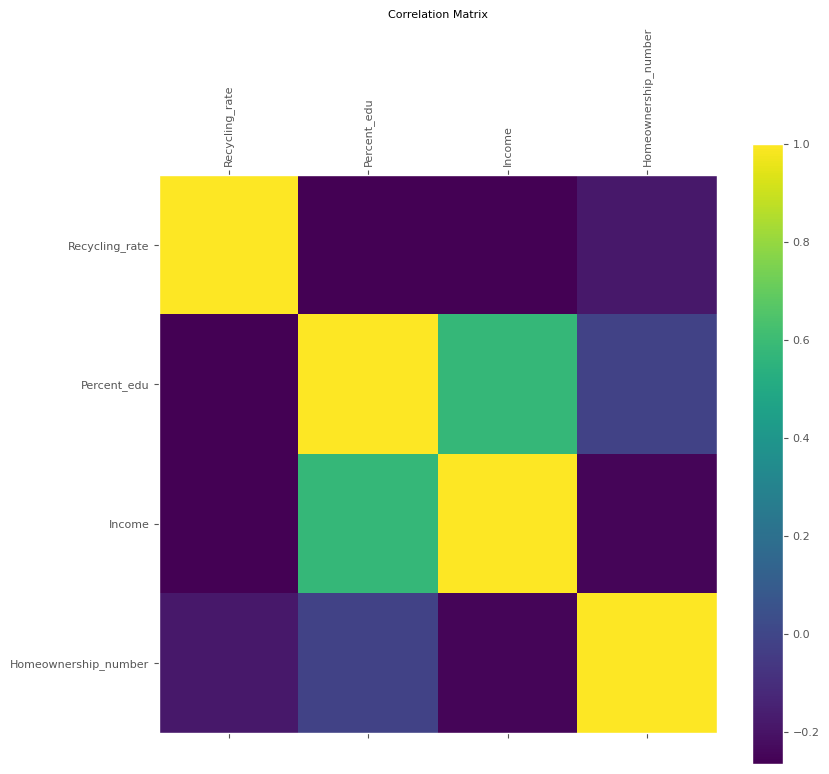

In [13]:
df = merged_df
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(9, 8))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=8, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)
plt.title('Correlation Matrix', fontsize=8)

# Building and interpreting a linear regression model

In [58]:
# calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [59]:
merged_df_VIF = drop_column_using_vif_(merged_df.drop('Recycling_rate', axis=1))
# Note that there is a 'while' loop in the drop_column_using_vif_. In each iteration, one variable is dropped.
print("The columns remaining after VIF selection are:")
print(merged_df_VIF.columns)

The columns remaining after VIF selection are:
Index(['Percent_edu', 'Income', 'Homeownership_number'], dtype='object')


In [62]:
merged_df = sm.OLS(endog=merged_df[['Recycling_rate']], exog=sm.add_constant(merged_df_VIF)).fit()
merged_df.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Recycling_rate   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1.577
Date:                Sun, 14 Jan 2024   Prob (F-statistic):              0.217
Time:                        23:47:45   Log-Likelihood:                -114.79
No. Observations:                  32   AIC:                             237.6
Df Residuals:                      28   BIC:                             243.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   56.8126     12.441      4.566      0.000      31.328      82.297
Percent_edu             -0.1150      0.203     -0.568      0.575      -0.530       0.300
Income               -7.947e-05   7.03e-05     -1.131      0.268      -0.000    6.45e-05
Homeownership_number    -0.0001   8.11e-05     -1.357      0.186      -0.000    5.61e-05
==============================================================================
Omnibus:                        0.823   Durbin-Watson:                   1.684
Prob(Omnibus):                  0.663   Jarque-Bera (JB):                0.788
Skew:                           0.343   Prob(JB):                        0.674
Kurtosis:                       2.651   Cond. No.                     9.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Residual analysis

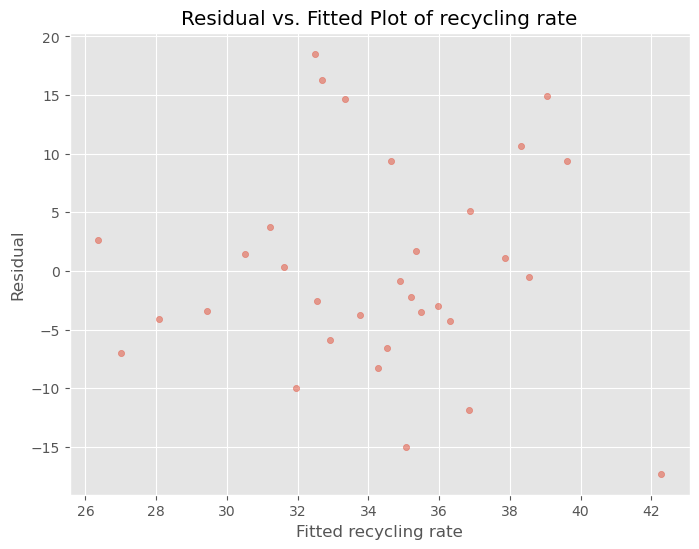

In [64]:
# Residuals vs. Fitted plot

# Set the figure size
plt.figure(figsize=(8, 6))  
# alpha = 0.5: controlling the transparency of the markers. Here alpha = 0.5 means that the markers are semi-transparent.
# s = 20: controlling the size of the markers. The default value is plt.rcParams['lines.markersize'] ** 2. Here we set it as 20.
# To get the default value of marker size, run the following line
# print(plt.rcParams['lines.markersize'] ** 2) 
plt.scatter(merged_df.fittedvalues, merged_df.resid, alpha = 0.5, s=20)
# plt.scatter(model_bike_rental.fittedvalues, model_bike_rental.resid, alpha = 0.5)
# adding title and labels
plt.xlabel('Fitted recycling rate')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of recycling rate')
# Adding grid lines
plt.grid(True)
plt.show()

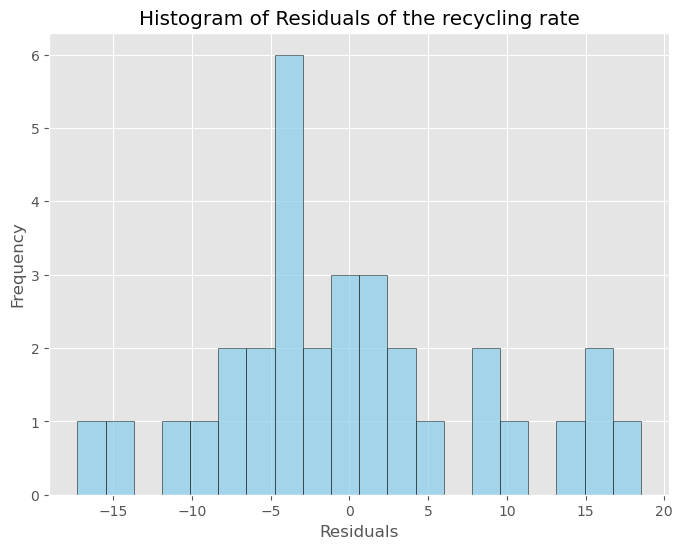

In [65]:
# Histogram of residuals

# Set the figure size
plt.figure(figsize=(8, 6))  

# Plotting the histogram
plt.hist(merged_df.resid, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals of the recycling rate')

# Adding grid lines (optional)
plt.grid(True)

# Display the plot
plt.show()

In [67]:
test_rainbow = statsmodels.stats.diagnostic.linear_rainbow(merged_df)
# This function returns a tuple consisting of two values: the test statistic based on the F test and the pvalue of the test
# Note that these two values are not named. Therefore, you need to know the order before accessing these two values.
print("The p value of the rainbow test: {:.4f}".format(test_rainbow[1]))

The p value of the rainbow test: 0.0054


In [68]:
test_Ljung_Box = statsmodels.stats.diagnostic.acorr_ljungbox(merged_df.resid)
# print the result
print(test_Ljung_Box)
print("The maximum p value of the Ljung Box test: {:.4f}".format(test_Ljung_Box.lb_pvalue.max()))

                                   lb_stat  \
1                                     0.26   
2                                     0.30   
3                                     0.30   
4                                     3.04   
5                                     3.12   
6                                     4.06   

                                 lb_pvalue  
1                                     0.61  
2                                     0.86  
3                                     0.96  
4                                     0.55  
5                                     0.68  
6                                     0.67  
The maximum p value of the Ljung Box test: 0.9604


In [ ]:
As all p values of this test is greater than the significance level of 0.05, we will not reject the hypothesis and conlude that the residuals are independent.

In [69]:
test_JB = statsmodels.stats.stattools.jarque_bera(merged_df.resid)
print("The p value of the Jarque Bera test: {:.4f}".format(test_JB[1]))

The p value of the Jarque Bera test: 0.6742


As the p value is greater than 0.05, we will not reject the null hypothesis and conclude that the residuals are normally distributed.